In [0]:
!pip install sklearn-relief

In [0]:
import sklearn_relief as relief
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
import pandas as pd

In [0]:
#step-1 load breast cancer dataset
breastCancerDataset=datasets.load_breast_cancer()
print("=============Targets=============")
print(breastCancerDataset.target_names)
print("=============Features============")
print(breastCancerDataset.feature_names)

=============Targets=============
['malignant' 'benign']
=============Features============
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


{'malignant': 212, 'benign': 357}


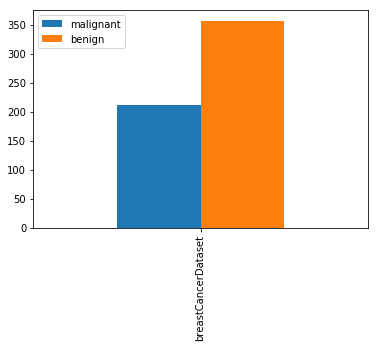

In [0]:
#Step 2:
# find feature names and target names
# show data and target
# Divide dataset into train set 70% and test set 30%
classes=np.unique(breastCancerDataset.target)
dic={}
for i in classes:
    dic[breastCancerDataset.target_names[i]]=len(np.where(breastCancerDataset.target==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['breastCancerDataset'],columns=breastCancerDataset.target_names).plot(kind='bar')

features=breastCancerDataset.data
target=breastCancerDataset.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

{'malignant': 149, 'benign': 249}


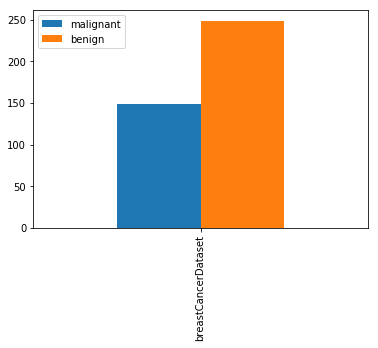

In [0]:
def plot_classes(df):
    classes=np.unique(df)
    dic={}
    for i in classes:
        dic[breastCancerDataset.target_names[i]]=len(np.where(df==i)[0])

    print(dic)
    _=pd.DataFrame(dic,index=['breastCancerDataset'],columns=breastCancerDataset.target_names).plot(kind='bar')
plot_classes(y_train)

{'malignant': 63, 'benign': 108}


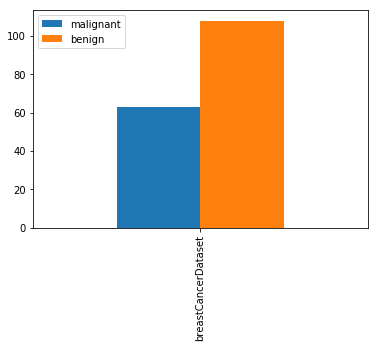

In [0]:
plot_classes(y_test)

In [0]:
#Step 3:
#train on all the classifiers
i=1
while i < 5:
  if i==1:
    print("==========================+============================================")
    print("                        Decisin Tree                                  ")
    print("======================================================================")
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    y_pred=clf.predict(X_test)
  elif i==2:
    print("======================================================================")
    print("                        Gaussian Naive Bayes                          ")
    print("======================================================================")
    clf = GaussianNB().fit(X_train, y_train)
    y_pred=clf.predict(X_test)
  elif i==3:
    print("======================================================================")
    print("                        Logistic Regression                           ")
    print("======================================================================")
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred=clf.predict(X_test)
  else:
    print("======================================================================")
    print("                        Linear SVM                                    ")
    print("======================================================================")
    clf = LinearSVC().fit(X_train, y_train)
    y_pred=clf.predict(X_test)
  print("Precision: %1.3f" % precision_score(y_test, y_pred,average='weighted'))
  print("Recall: %1.3f" % recall_score(y_test, y_pred,average='weighted'))
  print("F1: %1.3f\n" % f1_score(y_test, y_pred,average='weighted'))
  print( "accuracy_score:%1.3f\n"%accuracy_score(y_test, y_pred) )
  i += 1

==========================+============================================
                        Decisin Tree                                  
Precision: 0.943
Recall: 0.942
F1: 0.942

accuracy_score:0.942

                        Gaussian Naive Bayes                          
Precision: 0.941
Recall: 0.942
F1: 0.941

accuracy_score:0.942

                        Logistic Regression                           
Precision: 0.965
Recall: 0.965
F1: 0.965

accuracy_score:0.965

                        Linear SVM                                    
Precision: 0.956
Recall: 0.953
F1: 0.952

accuracy_score:0.953



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###Step 4: evaluate and compare classifiers based on accuracy and f-score


| classifier  | Accuracy  | F Scores  | 
|---|---|---|
| Decision Tree  | 0.936  | 0.936  |
| Gaussian Naive Bayes  | 0.942  | 0.941  |
| Logistic Regression  | 0.965  | 0.965  |
|  Linear SVM   | 0.924  | 0.922  |


In the case of breast cancer dataset, all algorithms peformed pretty good but *Logistic regression* showed the highest accuracy along with a better F score which indicates the number of features that indicated the disease and the output was that particular disease. Gaussian Navie Bayes, Decision Tree performed  and Linear SVM performed almost similar. 

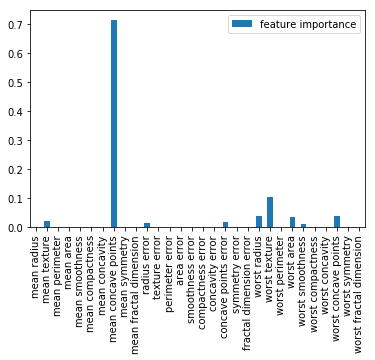

In [0]:
#Step 5: Find the most important features using decision Tree. show the most important features.
# create a new classifier using a subset of features and explore if it is possible to make 
# a better classifier using a subset of features?
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred=clf.predict(X_test)
#feature selection
df=pd.DataFrame(
clf.feature_importances_,
index=list(breastCancerDataset.feature_names))
df.columns=['feature importance']
_=df.plot(kind='bar')

The most important features for determining the type of breast cancer, according to decision tree classifier, in the breast cancer dataset were *mean concave points, worst texture, worst radius, worst concave points, worst area, worst smothness,concave points error, radius error and mean texture.*

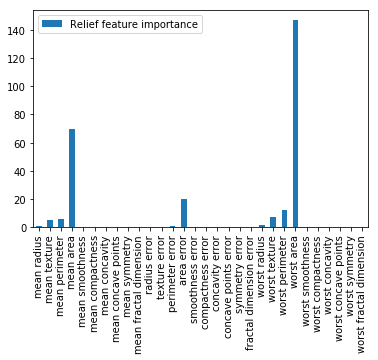

In [0]:
#Step 6: (bonus)
# relief is another feature selection approach. use relief to find the best classifier.
r = relief.Relief(
    n_features=3 # Choose the best 3 features
)

my_transformed_matrix = r.fit_transform(
    X_train,
    y_train
) 

df=pd.DataFrame(
r.w_,
index=list(breastCancerDataset.feature_names)
)
df.columns=['Relief feature importance']
_=df.plot(kind='bar')

According to relief feature selection model, the three most important features in breast cancer dataset were *worst area, mean area and area error.*